In [96]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [2]:
df = pd.read_csv('Data.csv',encoding='unicode_escape')
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

In [3]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [7]:
df.describe(include='object')

InvoiceNo StockCode                         Description  \
count     541909    541909                              540455   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   

             InvoiceDate         Country  
count             541909          541909  
unique             23260              38  
top     10/31/2011 14:41  United Kingdom  
freq                1114          495478

C:\Users\OM\AppData\Local\Temp\ipykernel_20300\4096592276.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_percent, y = missing_values.index, palette='mako')


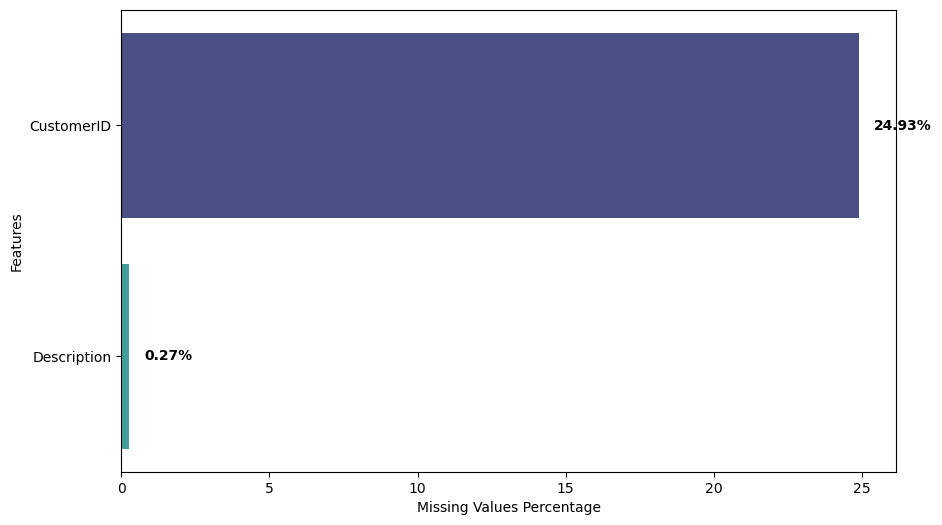

In [8]:
missing_values=df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) *100
missing_values = missing_values[missing_values>0].sort_values(ascending=False)

missing_percent = missing_percent[missing_percent>0].sort_values(ascending=False)
missing_percent
plt.figure(figsize=(10,6))
ax = sns.barplot(x=missing_percent, y = missing_values.index, palette='mako')

for i, v in enumerate(missing_percent.values):
  ax.text(v + 0.5, i, f"{v:.2f}%", color='black', va='center', fontweight='bold')

plt.xlabel('Missing Values Percentage')
plt.ylabel('Features')
plt.show()

In [9]:
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom

In [10]:
df=df.dropna(subset=['CustomerID', 'Description'])

In [11]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows_sorted = duplicated_rows.sort_values(by=['InvoiceNo','StockCode','CustomerID','Description','Quantity'])
duplicated_rows_sorted

InvoiceNo StockCode                          Description  Quantity  \
494       536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
485       536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
539       536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
...          ...       ...                                  ...       ...   
440149   C574510     22360      GLASS JAR ENGLISH CONFECTIONERY        -1   
461407   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
461408   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
529980   C580764     22667                RECIPE BOX RETROSPOT        -12   
529981   C580764     22667                RECIPE BOX RETROSPOT        -12   

             InvoiceDate  UnitPrice  CustomerID         Country  
494      12/1/2010 11:45       1.25     17908.0  United Kingdom  
517      12/1/2010 11:45       1.25     17908.0  United Kingdom  
485      12/1/2010 11:45       4.95     17908.0  United Kingdom  
539      12/1/2010 11:45       4.95     17908.0  United Kingdom  
489      12/1/2010 11:45       2.10     17908.0  United Kingdom  
...                  ...        ...         ...             ...  
440149   11/4/2011 13:25       2.95     15110.0  United Kingdom  
461407  11/13/2011 11:38       0.55     17838.0  United Kingdom  
461408  11/13/2011 11:38       0.55     17838.0  United Kingdom  
529980   12/6/2011 10:38       2.95     14562.0  United Kingdom  
529981   12/6/2011 10:38       2.95     14562.0  United Kingdom  

[10062 rows x 8 columns]

In [13]:
print(f"total duplicates are {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

total duplicates are 5225


C:\Users\OM\AppData\Local\Temp\ipykernel_20300\1715458486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [14]:
df['Transaction_status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

cancelled_transactions = df[df['Transaction_status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

C:\Users\OM\AppData\Local\Temp\ipykernel_20300\1415945928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction_status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')


Quantity     UnitPrice
count   8872.000000   8872.000000
mean     -30.774910     18.899512
std     1172.249902    445.190864
min   -80995.000000      0.010000
25%       -6.000000      1.450000
50%       -2.000000      2.950000
75%       -1.000000      4.950000
max       -1.000000  38970.000000

In [17]:
cancelled_percent = (cancelled_transactions.shape[0] / df.shape[0]) * 100


print(f"The percentage of cancellations is {cancelled_percent:.2f}%")

The percentage of cancellations is 2.21%


# **Stock Code Analysis**

In [18]:
unique_stock_codes = df['StockCode'].nunique()
print(f"Number of unique stock codes: {unique_stock_codes}")

Number of unique stock codes: 3684


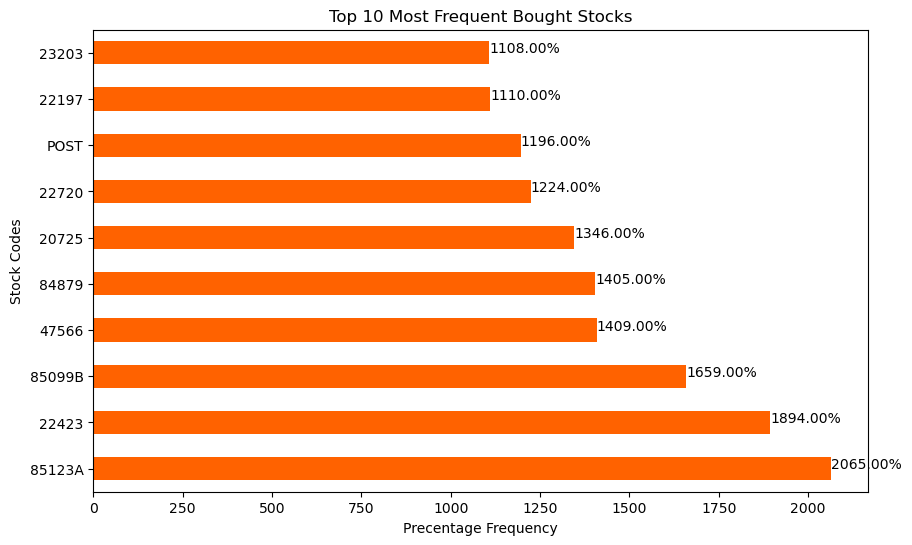

In [19]:
top_10_codes = df['StockCode'].value_counts().head(10)
top_10_codes

plt.figure(figsize=(10,6))
top_10_codes.plot(kind='barh', color = '#ff6200')

for i,v in enumerate(top_10_codes):
  plt.text(v, i,f'{v:.2f}%', fontsize=10)
plt.title("Top 10 Most Frequent Bought Stocks")
plt.xlabel("Precentage Frequency")
plt.ylabel("Stock Codes")
plt.show()

In [20]:
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x : sum(c.isdigit() for c in str(x))).value_counts()


print("value counts of numeric character frequencies in unique stock codes:")
print(numeric_char_counts_in_unique_codes)

value counts of numeric character frequencies in unique stock codes:
5    3676
0       7
1       1
Name: count, dtype: int64


In [21]:
anomalous = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]
for code in anomalous:
  print(code)

POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [22]:
percentage_anomalous = (df['StockCode'].isin(anomalous).sum() / len(df)) * 100
print(f"The percentage of anomalous stock codes is {percentage_anomalous:.2f}%")

The percentage of anomalous stock codes is 0.48%


In [23]:
df = df[~df['StockCode'].isin(anomalous)]

In [24]:
df.shape[0]

399689

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
LUNCH BAG RED RETROSPOT               1345
SET OF 3 CAKE TINS PANTRY DESIGN      1224
LUNCH BAG  BLACK SKULL.               1099
PACK OF 72 RETROSPOT CAKE CASES       1062
SPOTTY BUNTING                        1026
PAPER CHAIN KIT 50'S CHRISTMAS        1013
LUNCH BAG SPACEBOY DESIGN             1006
LUNCH BAG CARS BLUE                   1000
HEART OF WICKER SMALL                  990
NATURAL SLATE HEART CHALKBOARD         989
JAM MAKING SET WITH JARS               966
LUNCH BAG PINK POLKADOT                961
LUNCH BAG SUKI DESIGN                  932
ALARM CLOCK BAKELIKE RED               917
REX CASH+CARRY JUMBO SHOPPER           900
Name: count, dtype: int64


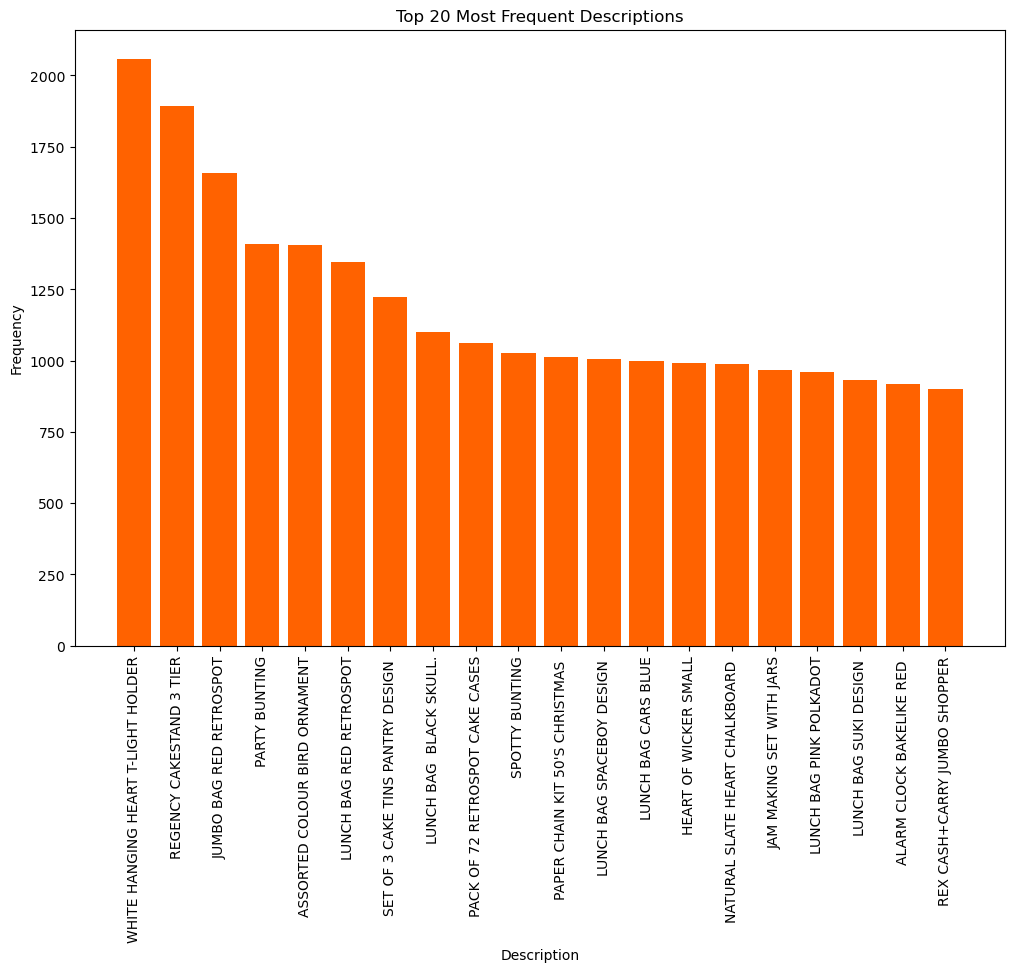

In [25]:
description_counts = df['Description'].value_counts()
description_counts

top_20_descriptions = description_counts[:20]
print(top_20_descriptions)
plt.figure(figsize=(12,8))
plt.bar(top_20_descriptions.index, top_20_descriptions.values, color='#ff6200')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Descriptions')
plt.xticks(rotation=90)
plt.show()

In [26]:
lower_description = df['Description'].unique()
lower_description = [desc for desc in lower_description
                     if any(char.islower() for char in desc)]

print("lower case characters in description :")
for desc in lower_description:
  print(desc)

lower case characters in description :
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [27]:
service_description = ["Next Day Carriage", "High Resolution Image"]
service_description_percent = df[df['Description'].isin(service_description)].shape[0] / df.shape[0] * 100

df = df[~df['Description'].isin(service_description)]
df['Description'] = df['Description'].str.upper()

In [28]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [29]:
df[df['UnitPrice']==0].describe()[['Quantity']]

Quantity
count     33.000000
mean     420.515152
std     2176.713608
min        1.000000
25%        2.000000
50%       11.000000
75%       36.000000
max    12540.000000

In [30]:
df = df[df['UnitPrice'] > 0]

In [31]:
df.shape[0]

399573

In [32]:
df.reset_index(drop=True, inplace=True)
df.shape[0]

399573

# **Recency**

In [33]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDay'] = df['InvoiceDate'].dt.date

customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

recent_date = df['InvoiceDay'].max()
print(recent_date)
customer_data ['InvoiceDay'] =  pd.to_datetime(customer_data['InvoiceDay'])
recent_date = pd.to_datetime(recent_date)

customer_data['days_since_Last_purchase'] = (recent_date - customer_data['InvoiceDay']).dt.days

customer_data.drop(columns = ['InvoiceDay'], inplace=True)
print(customer_data.head())


2011-12-09
   CustomerID  days_since_Last_purchase
0     12346.0                       325
1     12347.0                         2
2     12348.0                        75
3     12349.0                        18
4     12350.0                       310


# **Frequency**

In [38]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_transactions'}, inplace=True)
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_products_purchased'}, inplace=True)

customer_data = customer_data.merge(total_transactions, on='CustomerID')
customer_data = customer_data.merge(total_products_purchased, on='CustomerID')


In [39]:
customer_data.head(10)

CustomerID  days_since_Last_purchase  Total_transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   
5     12352.0                        36                   8   
6     12353.0                       204                   1   
7     12354.0                       232                   1   
8     12355.0                       214                   1   
9     12356.0                        22                   3   

   Total_products_purchased  
0                         0  
1                      2458  
2                      2332  
3                       630  
4                       196  
5                       463  
6                        20  
7                       530  
8                       240  
9                      1573

# **Monetary**

In [40]:
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_transaction_value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_transactions']

customer_data = pd.merge(customer_data, total_spend , on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID','Average_transaction_value']],on='CustomerID')
customer_data

CustomerID  days_since_Last_purchase  Total_transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4357     18280.0                       277                   1   
4358     18281.0                       180                   1   
4359     18282.0                         7                   3   
4360     18283.0                         3                  16   
4361     18287.0                        42                   3   

      Total_products_purchased  Total_Spend  Average_transaction_value  
0                            0         0.00                   0.000000  
1                         2458      4310.00                 615.714286  
2                         2332      1437.24                 359.310000  
3                          630      1457.55                1457.550000  
4                          196       294.40                 294.400000  
...                        ...          ...                        ...  
4357                        45       180.60                 180.600000  
4358                        54        80.82                  80.820000  
4359                        98       176.60                  58.866667  
4360                      1355      2039.58                 127.473750  
4361                      1586      1837.28                 612.426667  

[4362 rows x 6 columns]

# **Product** **Diversity**

In [42]:
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode':'Unique_Products_Purchased'}, inplace=True)

customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

customer_data

CustomerID  days_since_Last_purchase  Total_transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4357     18280.0                       277                   1   
4358     18281.0                       180                   1   
4359     18282.0                         7                   3   
4360     18283.0                         3                  16   
4361     18287.0                        42                   3   

      Total_products_purchased  Total_Spend  Average_transaction_value  \
0                            0         0.00                   0.000000   
1                         2458      4310.00                 615.714286   
2                         2332      1437.24                 359.310000   
3                          630      1457.55                1457.550000   
4                          196       294.40                 294.400000   
...                        ...          ...                        ...   
4357                        45       180.60                 180.600000   
4358                        54        80.82                  80.820000   
4359                        98       176.60                  58.866667   
4360                      1355      2039.58                 127.473750   
4361                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  
0                             1  
1                           103  
2                            21  
3                            72  
4                            16  
...                         ...  
4357                         10  
4358                          7  
4359                         12  
4360                        262  
4361                         59  

[4362 rows x 7 columns]

# **Behavioral Features**

In [43]:
df['Day_of_week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x:(x.diff().dropna()).apply(lambda y: y.days))

average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_days_between_purchases'},inplace=True)
average_days_between_purchases

C:\Users\OM\AppData\Local\Temp\ipykernel_20300\1856452949.py:4: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x:(x.diff().dropna()).apply(lambda y: y.days))


CustomerID  Average_days_between_purchases
0        12346.0                        0.000000
1        12347.0                        2.016575
2        12348.0                       10.884615
3        12349.0                        0.000000
4        12350.0                        0.000000
...          ...                             ...
4277     18280.0                        0.000000
4278     18281.0                        0.000000
4279     18282.0                        9.916667
4280     18283.0                        0.465181
4281     18287.0                        2.304348

[4282 rows x 2 columns]

In [44]:
favorite_shopping_day = df.groupby(['CustomerID', 'Day_of_week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_of_week']]
favorite_shopping_day

CustomerID  Day_of_week
0         12346.0            1
2         12347.0            1
6         12348.0            3
8         12349.0            0
9         12350.0            2
...           ...          ...
10599     18280.0            0
10600     18281.0            6
10602     18282.0            4
10606     18283.0            3
10608     18287.0            2

[4362 rows x 2 columns]

In [45]:
favorite_shopping_hour  = df.groupby(['CustomerID','Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID','Hour']]
favorite_shopping_hour

CustomerID  Hour
0         12346.0    10
5         12347.0    14
9         12348.0    19
10        12349.0     9
11        12350.0    16
...           ...   ...
12554     18280.0     9
12555     18281.0    10
12557     18282.0    13
12563     18283.0    14
12568     18287.0    10

[4362 rows x 2 columns]

In [46]:
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')
customer_data

CustomerID  days_since_Last_purchase  Total_transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_products_purchased  Total_Spend  Average_transaction_value  \
0                            0         0.00                   0.000000   
1                         2458      4310.00                 615.714286   
2                         2332      1437.24                 359.310000   
3                          630      1457.55                1457.550000   
4                          196       294.40                 294.400000   
...                        ...          ...                        ...   
4277                        45       180.60                 180.600000   
4278                        54        80.82                  80.820000   
4279                        98       176.60                  58.866667   
4280                      1355      2039.58                 127.473750   
4281                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_days_between_purchases  Day_of_week  \
0                             1                        0.000000            1   
1                           103                        2.016575            1   
2                            21                       10.884615            3   
3                            72                        0.000000            0   
4                            16                        0.000000            2   
...                         ...                             ...          ...   
4277                         10                        0.000000            0   
4278                          7                        0.000000            6   
4279                         12                        9.916667            4   
4280                        262                        0.465181            3   
4281                         59                        2.304348            2   

      Hour  
0       10  
1       14  
2       19  
3        9  
4       16  
...    ...  
4277     9  
4278    10  
4279    13  
4280    14  
4281    10  

[4282 rows x 10 columns]

In [47]:
df['Country'].value_counts(normalize=True)

Country
United Kingdom          0.890971
Germany                 0.022722
France                  0.020402
EIRE                    0.018440
Spain                   0.006162
Netherlands             0.005821
Belgium                 0.004933
Switzerland             0.004612
Portugal                0.003571
Australia               0.003136
Norway                  0.002650
Italy                   0.001960
Channel Islands         0.001882
Finland                 0.001634
Cyprus                  0.001522
Sweden                  0.001091
Austria                 0.000969
Denmark                 0.000939
Japan                   0.000888
Poland                  0.000841
USA                     0.000728
Israel                  0.000618
Unspecified             0.000603
Singapore               0.000538
Iceland                 0.000455
Canada                  0.000375
Greece                  0.000355
Malta                   0.000308
United Arab Emirates    0.000168
European Community      0.000145
RS

In [48]:
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_transactions')
customer_country


CustomerID         Country  Number_of_transactions
0        12346.0  United Kingdom                       2
1        12347.0         Iceland                     182
2        12348.0         Finland                      27
3        12349.0           Italy                      72
4        12350.0          Norway                      16
...          ...             ...                     ...
4365     18280.0  United Kingdom                      10
4366     18281.0  United Kingdom                       7
4367     18282.0  United Kingdom                      13
4368     18283.0  United Kingdom                     719
4369     18287.0  United Kingdom                      70

[4370 rows x 3 columns]

In [49]:
customer_main_country = customer_country.sort_values(by='Number_of_transactions', ascending=False).drop_duplicates('CustomerID')
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x:1 if x=='United Kingdom'else 0)
customer_main_country

CustomerID         Country  Number_of_transactions  Is_UK
4041     17841.0  United Kingdom                    7800      1
1899     14911.0            EIRE                    5806      0
1304     14096.0  United Kingdom                    5095      1
336      12748.0  United Kingdom                    4440      1
1678     14606.0  United Kingdom                    2755      1
...          ...             ...                     ...    ...
2527     15753.0  United Kingdom                       1      1
647      13185.0  United Kingdom                       1      1
650      13188.0  United Kingdom                       1      1
1117     13841.0  United Kingdom                       1      1
598      13120.0  United Kingdom                       1      1

[4362 rows x 4 columns]

In [50]:
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID')
customer_data

CustomerID  days_since_Last_purchase  Total_transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_products_purchased  Total_Spend  Average_transaction_value  \
0                            0         0.00                   0.000000   
1                         2458      4310.00                 615.714286   
2                         2332      1437.24                 359.310000   
3                          630      1457.55                1457.550000   
4                          196       294.40                 294.400000   
...                        ...          ...                        ...   
4277                        45       180.60                 180.600000   
4278                        54        80.82                  80.820000   
4279                        98       176.60                  58.866667   
4280                      1355      2039.58                 127.473750   
4281                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_days_between_purchases  Day_of_week  \
0                             1                        0.000000            1   
1                           103                        2.016575            1   
2                            21                       10.884615            3   
3                            72                        0.000000            0   
4                            16                        0.000000            2   
...                         ...                             ...          ...   
4277                         10                        0.000000            0   
4278                          7                        0.000000            6   
4279                         12                        9.916667            4   
4280                        262                        0.465181            3   
4281                         59                        2.304348            2   

      Hour  Is_UK  
0       10      1  
1       14      0  
2       19      0  
3        9      0  
4       16      0  
...    ...    ...  
4277     9      1  
4278    10      1  
4279    13      1  
4280    14      1  
4281    10      1  

[4282 rows x 11 columns]

In [51]:
customer_data['Is_UK'].value_counts()

Is_UK
1    3866
0     416
Name: count, dtype: int64

In [52]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

cancelled_transactions = df[df['Transaction_status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'},inplace=True)

customer_data = pd.merge(customer_data,cancellation_frequency, on='CustomerID', how='left')
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)
customer_data

CustomerID  days_since_Last_purchase  Total_transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_products_purchased  Total_Spend  Average_transaction_value  \
0                            0         0.00                   0.000000   
1                         2458      4310.00                 615.714286   
2                         2332      1437.24                 359.310000   
3                          630      1457.55                1457.550000   
4                          196       294.40                 294.400000   
...                        ...          ...                        ...   
4277                        45       180.60                 180.600000   
4278                        54        80.82                  80.820000   
4279                        98       176.60                  58.866667   
4280                      1355      2039.58                 127.473750   
4281                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_days_between_purchases  Day_of_week  \
0                             1                        0.000000            1   
1                           103                        2.016575            1   
2                            21                       10.884615            3   
3                            72                        0.000000            0   
4                            16                        0.000000            2   
...                         ...                             ...          ...   
4277                         10                        0.000000            0   
4278                          7                        0.000000            6   
4279                         12                        9.916667            4   
4280                        262                        0.465181            3   
4281                         59                        2.304348            2   

      Hour  Is_UK  Cancellation_Frequency  
0       10      1                     1.0  
1       14      0                     0.0  
2       19      0                     0.0  
3        9      0                     0.0  
4       16      0                     0.0  
...    ...    ...                     ...  
4277     9      1                     0.0  
4278    10      1                     0.0  
4279    13      1                     1.0  
4280    14      1                     0.0  
4281    10      1                     0.0  

[4282 rows x 12 columns]

In [53]:
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo'] * 100
customer_data

CustomerID  days_since_Last_purchase  Total_transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_products_purchased  Total_Spend  Average_transaction_value  \
0                            0         0.00                   0.000000   
1                         2458      4310.00                 615.714286   
2                         2332      1437.24                 359.310000   
3                          630      1457.55                1457.550000   
4                          196       294.40                 294.400000   
...                        ...          ...                        ...   
4277                        45       180.60                 180.600000   
4278                        54        80.82                  80.820000   
4279                        98       176.60                  58.866667   
4280                      1355      2039.58                 127.473750   
4281                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_days_between_purchases  Day_of_week  \
0                             1                        0.000000            1   
1                           103                        2.016575            1   
2                            21                       10.884615            3   
3                            72                        0.000000            0   
4                            16                        0.000000            2   
...                         ...                             ...          ...   
4277                         10                        0.000000            0   
4278                          7                        0.000000            6   
4279                         12                        9.916667            4   
4280                        262                        0.465181            3   
4281                         59                        2.304348            2   

      Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  
0       10      1                     1.0          50.000000  
1       14      0                     0.0           0.000000  
2       19      0                     0.0           0.000000  
3        9      0                     0.0           0.000000  
4       16      0                     0.0           0.000000  
...    ...    ...                     ...                ...  
4277     9      1                     0.0           0.000000  
4278    10      1                     0.0           0.000000  
4279    13      1                     1.0          14.285714  
4280    14      1                     0.0           0.000000  
4281    10      1                     0.0           0.000000  

[4282 rows x 13 columns]

In [54]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

monthly_spendings = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

seasonal_buying_patterns = monthly_spendings.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std':'Monthly_Spending_Std'}, inplace=True)
seasonal_buying_patterns

CustomerID  Monthly_Spending_Mean  Monthly_Spending_Std
0        12346.0               0.000000                   NaN
1        12347.0             615.714286            341.070789
2        12348.0             359.310000            203.875689
3        12349.0            1457.550000                   NaN
4        12350.0             294.400000                   NaN
...          ...                    ...                   ...
4357     18280.0             180.600000                   NaN
4358     18281.0              80.820000                   NaN
4359     18282.0              88.300000             14.792674
4360     18283.0             203.958000            165.798738
4361     18287.0             918.640000            216.883792

[4362 rows x 3 columns]

In [55]:
from scipy.stats import linregress

seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

def calculate_trend(spend_data):
  if len(spend_data) > 1:
    x = np.arange(len(spend_data))
    slope, _, _, _, _ = linregress(x, spend_data)
    return slope
  else:
    return 0

spending_trends = monthly_spendings.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'},inplace=True)
spending_trends

customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')
customer_data

CustomerID  days_since_Last_purchase  Total_transactions  \
0        12346.0                       325                   2   
1        12347.0                         2                   7   
2        12348.0                        75                   4   
3        12349.0                        18                   1   
4        12350.0                       310                   1   
...          ...                       ...                 ...   
4277     18280.0                       277                   1   
4278     18281.0                       180                   1   
4279     18282.0                         7                   3   
4280     18283.0                         3                  16   
4281     18287.0                        42                   3   

      Total_products_purchased  Total_Spend  Average_transaction_value  \
0                            0         0.00                   0.000000   
1                         2458      4310.00                 615.714286   
2                         2332      1437.24                 359.310000   
3                          630      1457.55                1457.550000   
4                          196       294.40                 294.400000   
...                        ...          ...                        ...   
4277                        45       180.60                 180.600000   
4278                        54        80.82                  80.820000   
4279                        98       176.60                  58.866667   
4280                      1355      2039.58                 127.473750   
4281                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_days_between_purchases  Day_of_week  \
0                             1                        0.000000            1   
1                           103                        2.016575            1   
2                            21                       10.884615            3   
3                            72                        0.000000            0   
4                            16                        0.000000            2   
...                         ...                             ...          ...   
4277                         10                        0.000000            0   
4278                          7                        0.000000            6   
4279                         12                        9.916667            4   
4280                        262                        0.465181            3   
4281                         59                        2.304348            2   

      Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0       10      1                     1.0          50.000000   
1       14      0                     0.0           0.000000   
2       19      0                     0.0           0.000000   
3        9      0                     0.0           0.000000   
4       16      0                     0.0           0.000000   
...    ...    ...                     ...                ...   
4277     9      1                     0.0           0.000000   
4278    10      1                     0.0           0.000000   
4279    13      1                     1.0          14.285714   
4280    14      1                     0.0           0.000000   
4281    10      1                     0.0           0.000000   

      Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0                  0.000000              0.000000        0.000000  
1                615.714286            341.070789        4.486071  
2                359.310000            203.875689     -100.884000  
3               1457.550000              0.000000        0.000000  
4                294.400000              0.000000        0.000000  
...                     ...                   ...             ...  
4277             180.600000              0.000000        0.000000  
4278              80.820000              0.000000 

In [56]:
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)
customer_data = customer_data.convert_dtypes()

In [57]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05, random_state=0)

customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:])

customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]
customer_data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


CustomerID  days_since_Last_purchase  Total_transactions  \
0       12346.0                       325                   2   
1       12347.0                         2                   7   
2       12348.0                        75                   4   
3       12349.0                        18                   1   
4       12350.0                       310                   1   
...         ...                       ...                 ...   
4277    18280.0                       277                   1   
4278    18281.0                       180                   1   
4279    18282.0                         7                   3   
4280    18283.0                         3                  16   
4281    18287.0                        42                   3   

      Total_products_purchased  Total_Spend  Average_transaction_value  \
0                            0          0.0                        0.0   
1                         2458       4310.0                 615.714286   
2                         2332      1437.24                     359.31   
3                          630      1457.55                    1457.55   
4                          196        294.4                      294.4   
...                        ...          ...                        ...   
4277                        45        180.6                      180.6   
4278                        54        80.82                      80.82   
4279                        98        176.6                  58.866667   
4280                      1355      2039.58                  127.47375   
4281                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_days_between_purchases  Day_of_week  \
0                             1                             0.0            1   
1                           103                        2.016575            1   
2                            21                       10.884615            3   
3                            72                             0.0            0   
4                            16                             0.0            2   
...                         ...                             ...          ...   
4277                         10                             0.0            0   
4278                          7                             0.0            6   
4279                         12                        9.916667            4   
4280                        262                        0.465181            3   
4281                         59                        2.304348            2   

      Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0       10      1                       1               50.0   
1       14      0                       0                0.0   
2       19      0                       0                0.0   
3        9      0                       0                0.0   
4       16      0                       0                0.0   
...    ...    ...                     ...                ...   
4277     9      1                       0                0.0   
4278    10      1                       0                0.0   
4279    13      1                       1          14.285714   
4280    14      1                       0                0.0   
4281    10      1                       0                0.0   

      Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  \
0                       0.0                   0.0             0.0   
1                615.714286            341.070789        4.486071   
2                    359.31            203.875689        -100.884   
3                   1457.55                   0.0             0.0   
4                     294.4                   0.0             0.0   
...                     ...                   ...             ...   
4277                  180.6                   0.0             0.0   
4278                  80.82                   0.0    

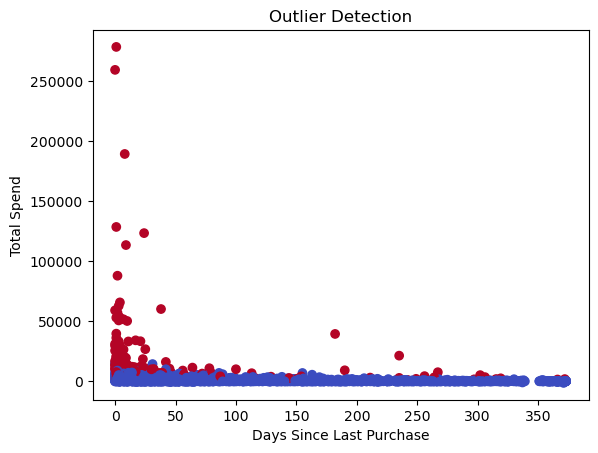

In [58]:
import matplotlib.pyplot as plt

plt.scatter(customer_data['days_since_Last_purchase'], customer_data['Total_Spend'],
            c=customer_data['Is_Outlier'], cmap='coolwarm')
plt.title("Outlier Detection")
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Total Spend")
plt.show()

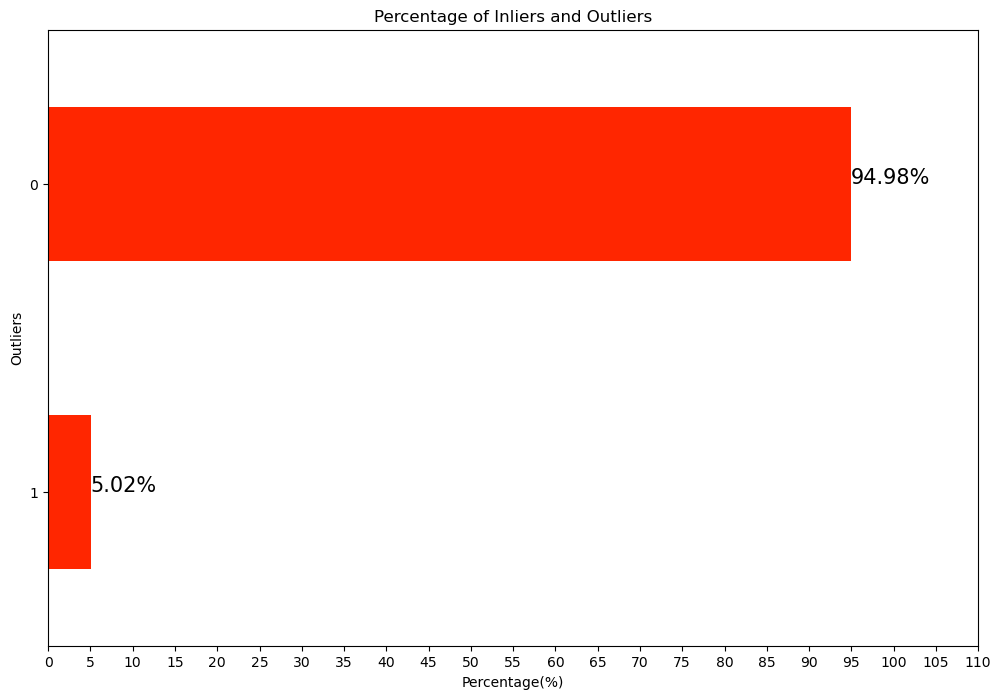

In [59]:
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) *100

plt.figure(figsize=(12,8))
outlier_percentage.plot(kind='barh', color='#ff2600')

for i,v in enumerate(outlier_percentage):
  plt.text(v,i,f'{v:.2f}%', fontsize=15)

plt.title("Percentage of Inliers and Outliers")
plt.xticks(ticks=np.arange(0,115,5))
plt.xlabel("Percentage(%)")
plt.ylabel("Outliers")
plt.gca().invert_yaxis()
plt.show()

In [60]:
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

customer_data_cleaned.reset_index(drop=True, inplace=True)

In [61]:
customer_data_cleaned.shape[0]

4067

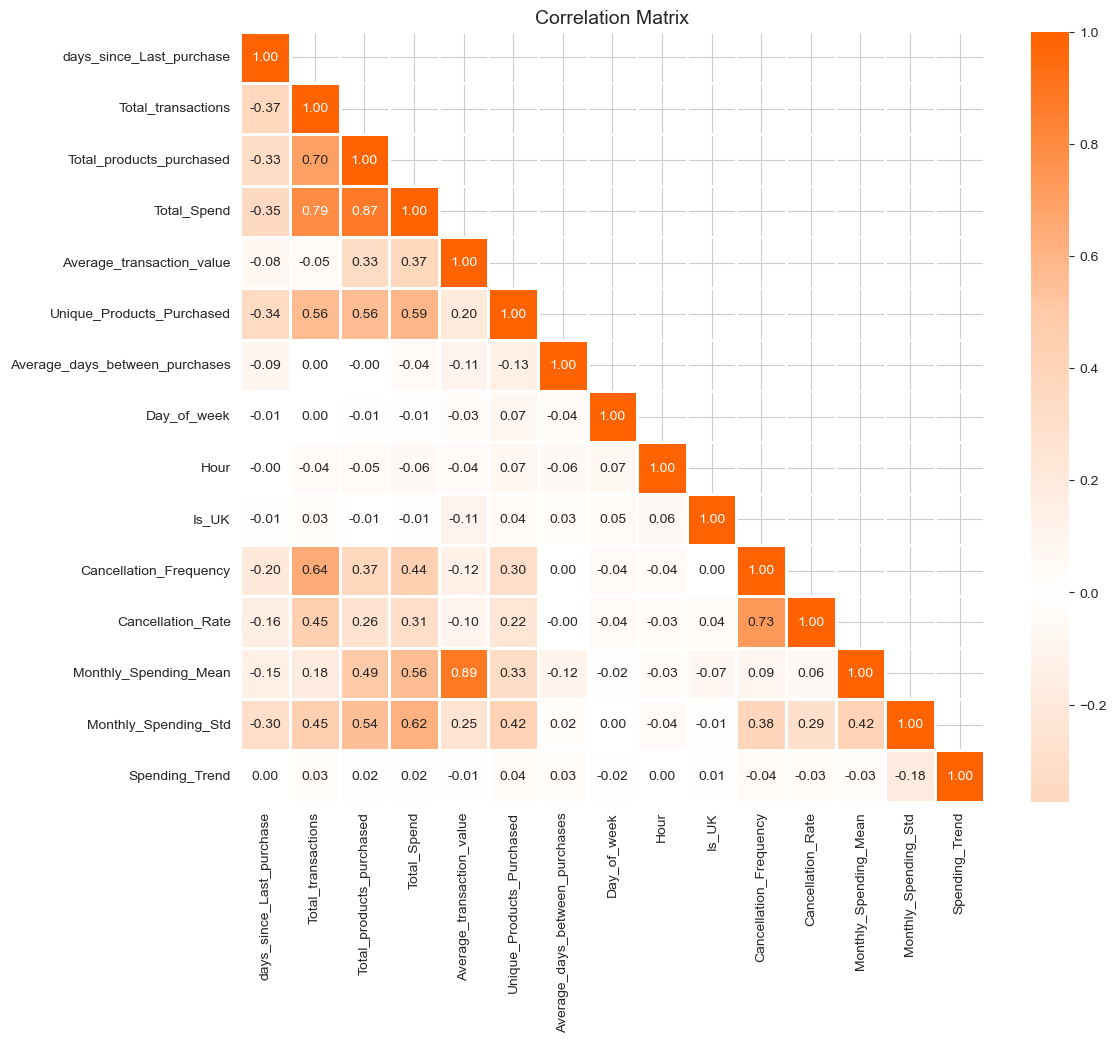

In [64]:
sns.set_style('whitegrid')

corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)


mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [65]:
scaler = StandardScaler()

columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

customer_data_scaled = customer_data_cleaned.copy()

customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

customer_data_scaled.head()

CustomerID  days_since_Last_purchase  Total_transactions  \
0    12346.0                  2.345802           -0.477589   
1    12347.0                 -0.905575            0.707930   
2    12348.0                 -0.170744           -0.003381   
3    12349.0                 -0.744516           -0.714692   
4    12350.0                  2.194809           -0.714692   

   Total_products_purchased  Total_Spend  Average_transaction_value  \
0                 -0.754491    -0.813464                  -1.317106   
1                  2.005048     2.366920                   1.528132   
2                  1.863591     0.247087                   0.343279   
3                 -0.047205     0.262074                   5.418285   
4                 -0.534446    -0.596223                   0.043327   

   Unique_Products_Purchased  Average_days_between_purchases  Day_of_week  \
0                  -0.908471                       -0.310564    -0.836041   
1                   0.815119                       -0.128438    -0.836041   
2                  -0.570512                        0.672476     0.241841   
3                   0.291283                       -0.310564    -1.374982   
4                  -0.655002                       -0.310564    -0.297100   

       Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0 -1.086929      1                0.420541           0.417623   
1  0.647126      0               -0.545753          -0.432111   
2  2.814696      0               -0.545753          -0.432111   
3 -1.520443      0               -0.545753          -0.432111   
4  1.514154      0               -0.545753          -0.432111   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0              -1.329018             -0.713318        0.090868  
1               0.989511              1.259961        0.116774  
2               0.023997              0.466213       -0.491708  
3               4.159521             -0.713318        0.090868  
4              -0.220428             -0.713318        0.090868

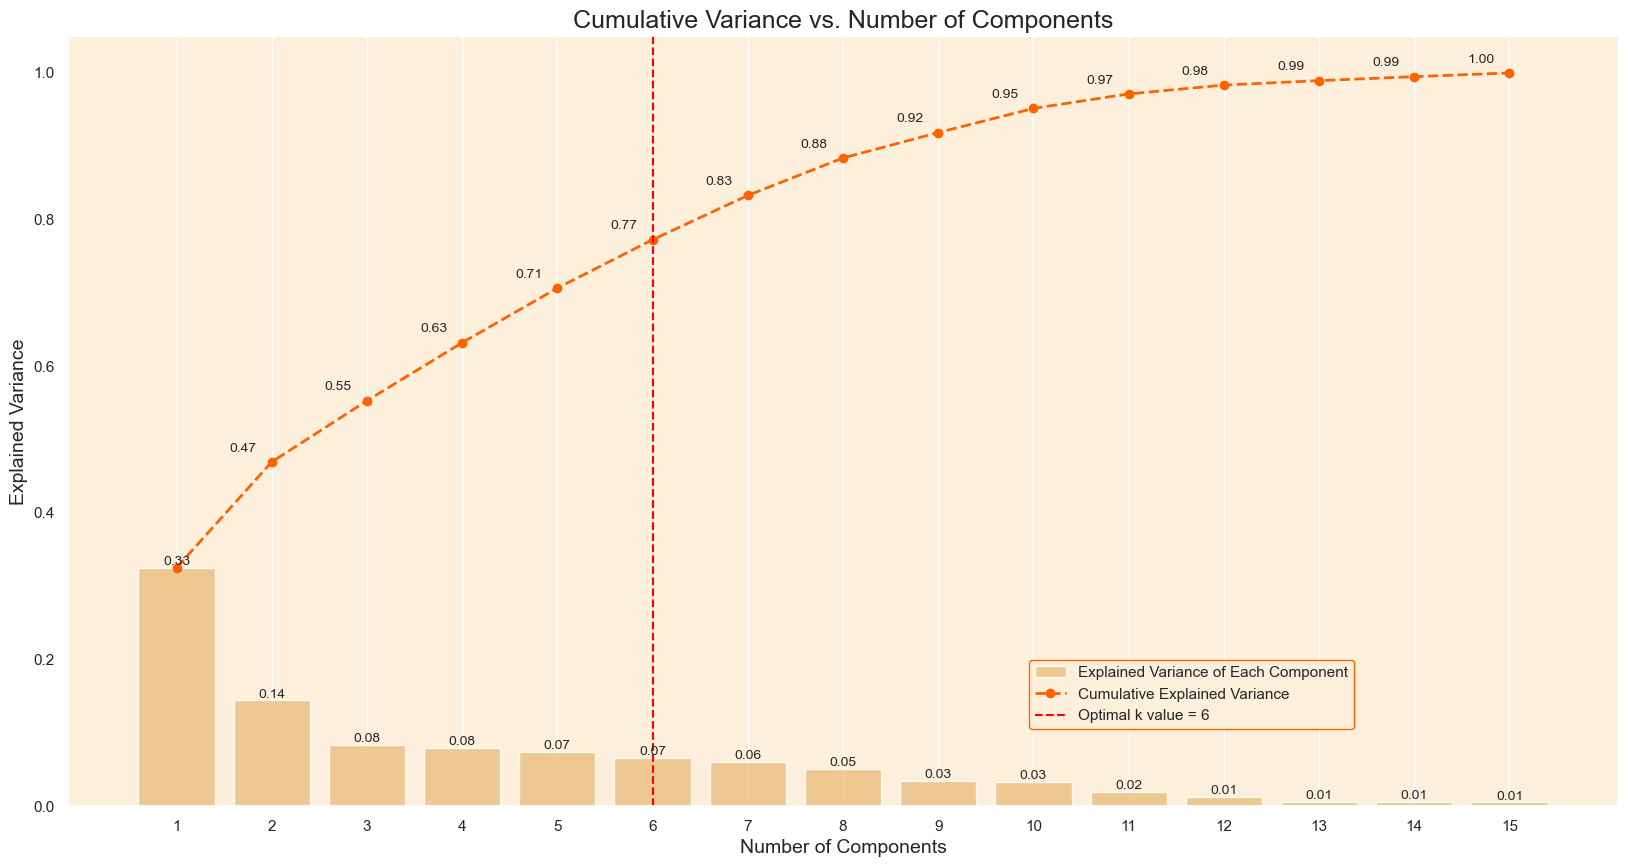

In [66]:
customer_data_scaled.set_index('CustomerID', inplace=True)

pca = PCA().fit(customer_data_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

optimal_k = 6

sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

plt.figure(figsize=(20, 10))

barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [67]:
pca = PCA(n_components=6)

customer_data_pca = pca.fit_transform(customer_data_scaled)

customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

customer_data_pca.index = customer_data_scaled.index

In [68]:
customer_data_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
CustomerID                                                            
12346.0    -2.226368 -1.593767  1.247513 -0.815533 -1.510003 -0.611977
12347.0     3.255001  1.910583 -0.148921  0.823089  0.193882  0.993528
12348.0     0.597695  0.672036 -1.348152  0.130088  1.259976  1.953331
12349.0     1.726564  5.820863  2.417123 -0.063863 -1.185015  0.163719
12350.0    -2.010196  0.574818 -0.576032 -0.804073 -0.936125  0.983301

In [69]:
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

In [74]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/282.6 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------  276.5/282.6 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.7 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


# **K-Means Clustering**

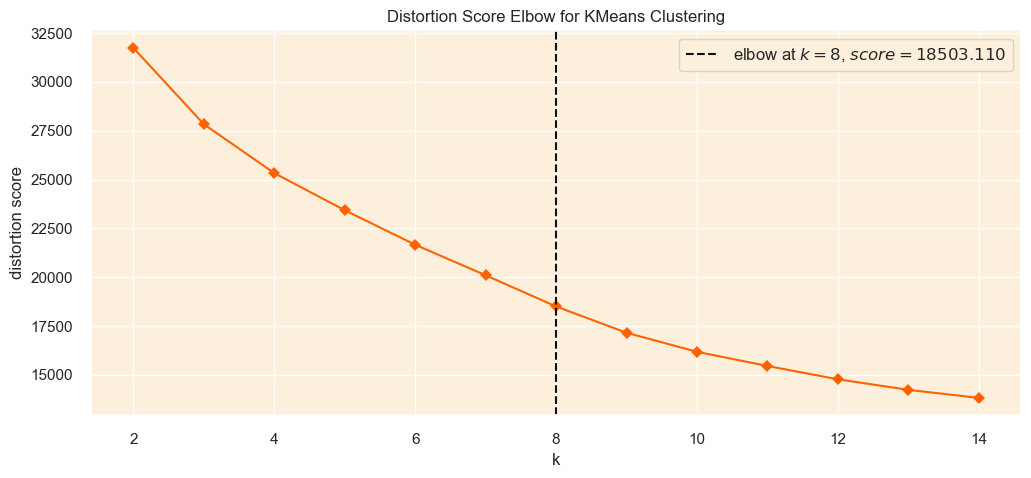

In [75]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

sns.set_palette(['#ff6200'])

km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

fig, ax = plt.subplots(figsize=(12, 5))

visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

visualizer.fit(customer_data_pca)

visualizer.show();

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    plt.figure(figsize=figsize)

    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    first_plot = plt.subplot(grid[0, :])

    sns.set_palette(['darkorange'])

    silhouette_scores = []

    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()


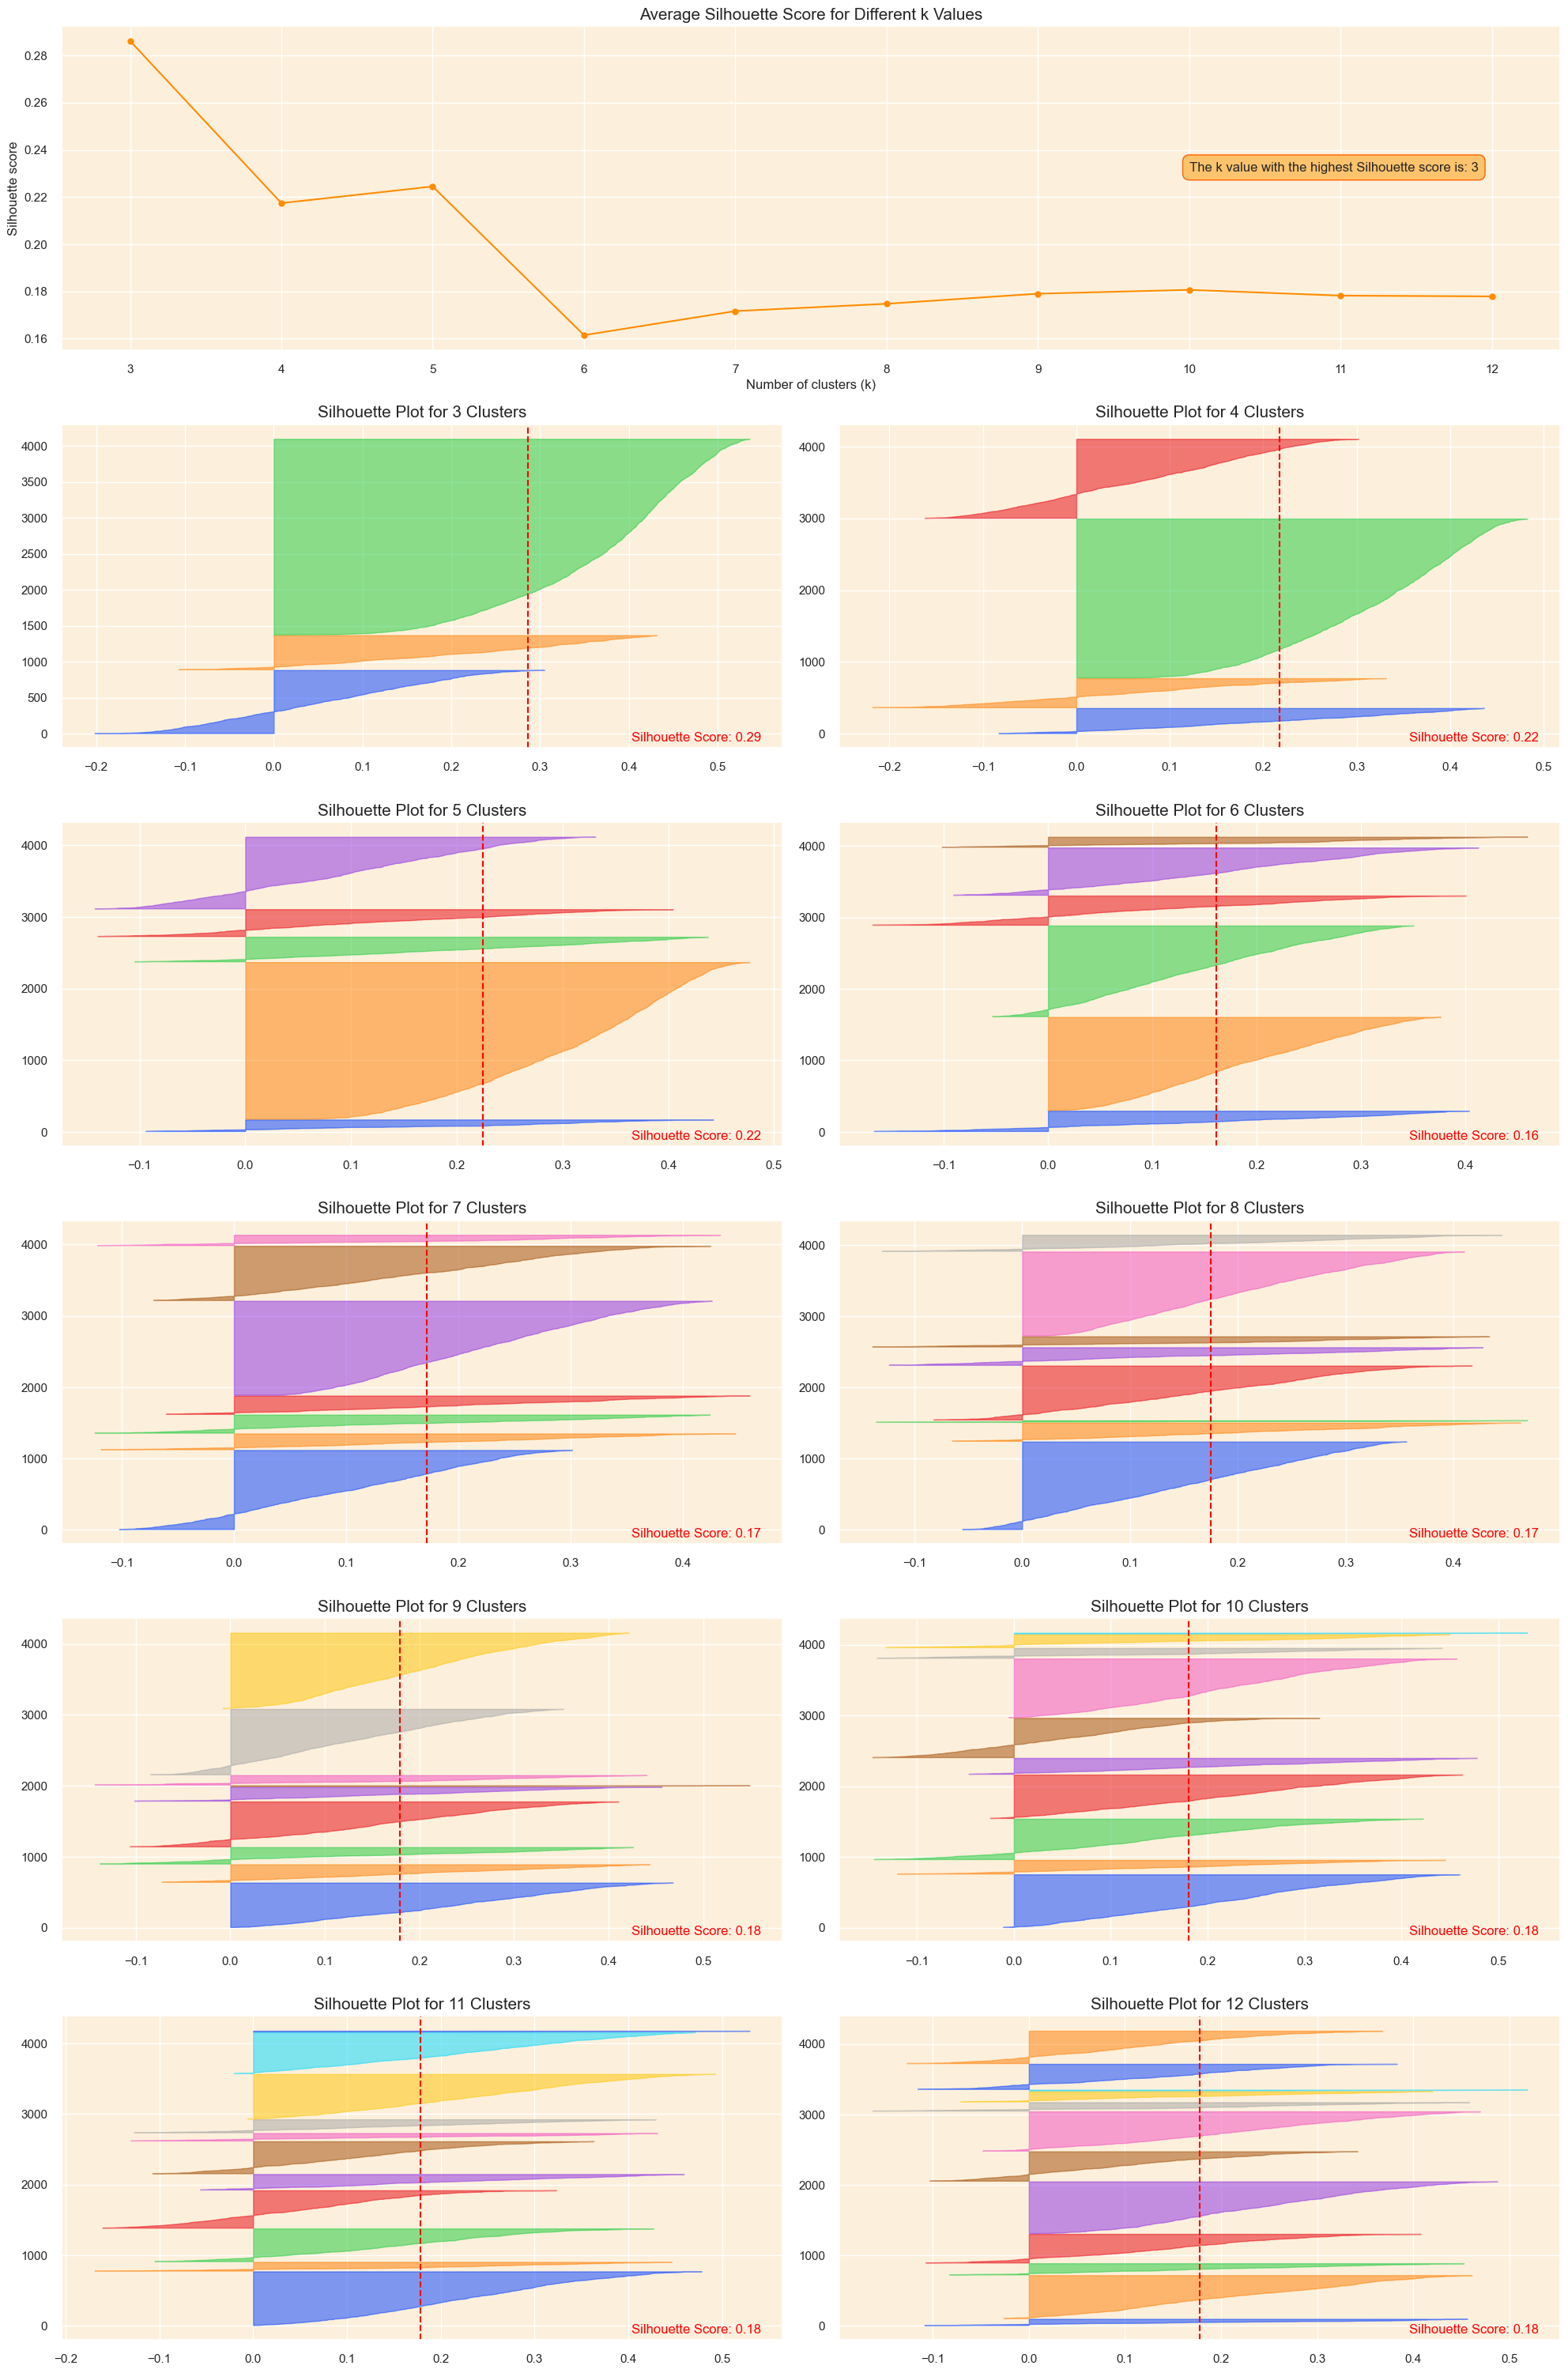

In [93]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

cluster_frequencies = Counter(kmeans.labels_)

label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

customer_data_cleaned['cluster'] = new_labels

customer_data_pca['cluster'] = new_labels

In [91]:
customer_data_cleaned.head()

CustomerID  days_since_Last_purchase  Total_transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   

   Total_products_purchased  Total_Spend  Average_transaction_value  \
0                         0          0.0                        0.0   
1                      2458       4310.0                 615.714286   
2                      2332      1437.24                     359.31   
3                       630      1457.55                    1457.55   
4                       196        294.4                      294.4   

   Unique_Products_Purchased  Average_days_between_purchases  Day_of_week  \
0                          1                             0.0            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                             0.0            0   
4                         16                             0.0            2   

   Hour  Is_UK  Cancellation_Frequency  Cancellation_Rate  \
0    10      1                       1               50.0   
1    14      0                       0                0.0   
2    19      0                       0                0.0   
3     9      0                       0                0.0   
4    16      0                       0                0.0   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0                    0.0                   0.0             0.0  
1             615.714286            341.070789        4.486071  
2                 359.31            203.875689        -100.884  
3                1457.55                   0.0             0.0  
4                  294.4                   0.0             0.0

In [94]:
colors = ['#e8000b', '#1ac938', '#023eff']

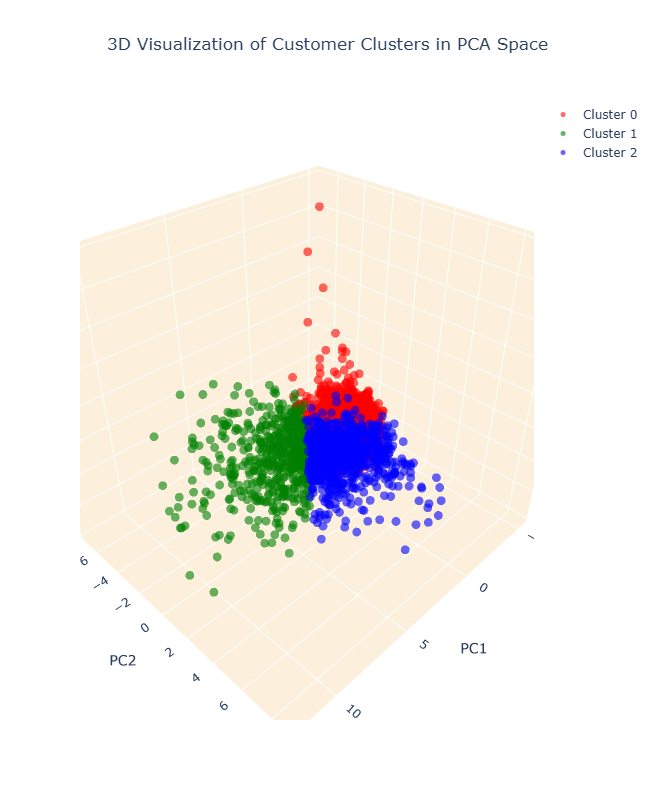

In [99]:
import plotly.graph_objects as go
from sklearn.cluster import KMeans

if 'cluster' not in customer_data_pca.columns:
    kmeans = KMeans(n_clusters=3, random_state=42)
    customer_data_pca['cluster'] = kmeans.fit_predict(customer_data_pca[['PC1','PC2','PC3']])

colors = ['red', 'green', 'blue']

fig = go.Figure()

for cluster_id, color in zip(sorted(customer_data_pca['cluster'].unique()), colors):
    cluster_data = customer_data_pca[customer_data_pca['cluster'] == cluster_id]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['PC1'],
        y=cluster_data['PC2'],
        z=cluster_data['PC3'],
        mode='markers',
        marker=dict(color=color, size=5, opacity=0.6),
        name=f'Cluster {cluster_id}'
    ))

fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

fig.show()


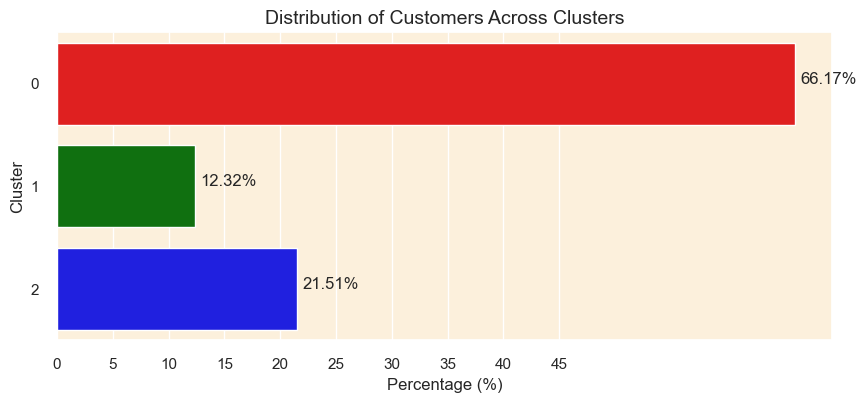

In [100]:
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

plt.show()

In [101]:
num_observations = len(customer_data_pca)

X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        4067        |
|    Silhouette Score     | 0.2738823606202079 |
| Calinski Harabasz Score | 1192.4112171338925 |
|  Davies Bouldin Score   | 1.5887173877799554 |
+-------------------------+--------------------+


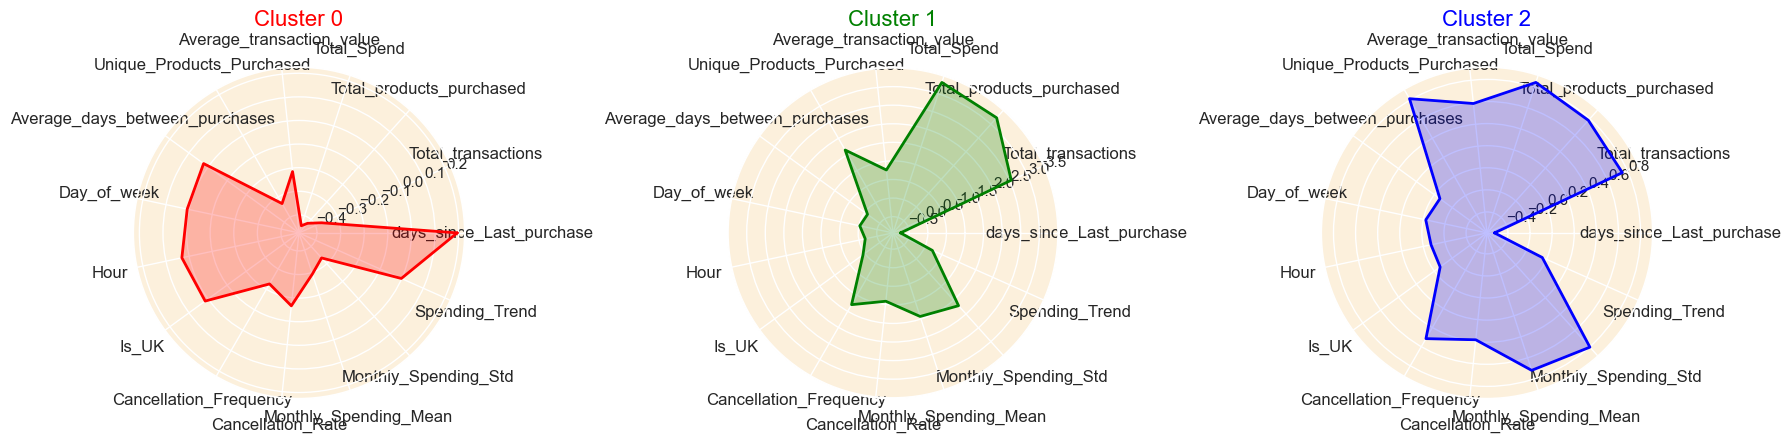

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

if 'cluster' not in df_customer.columns:
    kmeans = KMeans(n_clusters=3, random_state=42)
    df_customer['cluster'] = kmeans.fit_predict(df_customer)

cols_to_scale = df_customer.columns.drop('cluster')
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer[cols_to_scale])
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=cols_to_scale, index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

cluster_centroids = df_customer_standardized.groupby('cluster').mean()

labels = np.array(cluster_centroids.columns)  
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

num_clusters = cluster_centroids.shape[0]
fig, axes = plt.subplots(1, num_clusters, figsize=(6*num_clusters, 6), subplot_kw=dict(polar=True))

if num_clusters == 1:
    axes = [axes]

def create_radar_chart(ax, data, color, cluster_id):
    data = data.tolist()
    data += data[:1]  
    ax.plot(angles, data, color=color, linewidth=2)
    ax.fill(angles, data, color=color, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_title(f'Cluster {cluster_id}', size=16, color=color, y=1.1)

for i, (cluster_id, row) in enumerate(cluster_centroids.iterrows()):
    color = colors[i % len(colors)]
    create_radar_chart(axes[i], row, color, cluster_id)

plt.tight_layout()
plt.show()


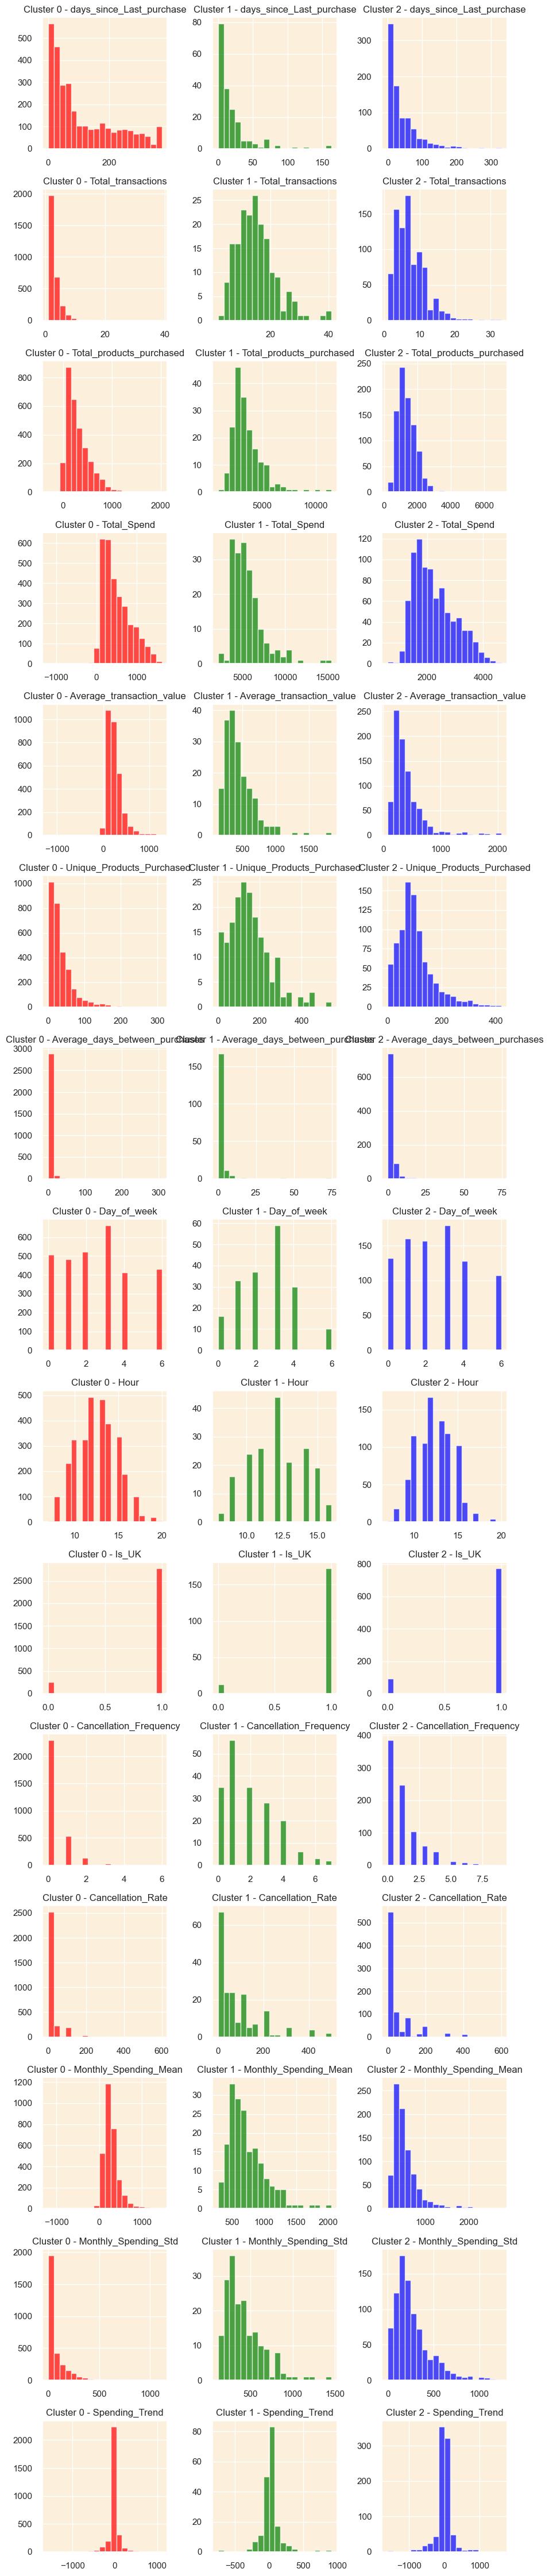

In [108]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

if 'cluster' not in customer_data_cleaned.columns:
    features_for_clustering = customer_data_cleaned.iloc[:, 1:]
    kmeans = KMeans(n_clusters=3, random_state=42)
    customer_data_cleaned['cluster'] = kmeans.fit_predict(features_for_clustering)

features = customer_data_cleaned.columns[1:-1]  # Adjust if ID column differs

clusters = sorted(customer_data_cleaned['cluster'].unique())

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']

n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 3*n_rows))

if n_rows == 1 and n_cols == 1:
    axes = np.array([[axes]])
elif n_rows == 1:
    axes = axes[np.newaxis, :]
elif n_cols == 1:
    axes = axes[:, np.newaxis]

for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j % len(colors)], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=12)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

plt.tight_layout()
plt.show()


In [109]:
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

customer_purchases = merged_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()

recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster]
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    
    for customer in customers_in_cluster:
        customer_purchased_products = customer_purchases[(customer_purchases['CustomerID'] == customer) & 
                                                         (customer_purchases['cluster'] == cluster)]['StockCode'].tolist()
        
        top_products_not_purchased = top_products[~top_products['StockCode'].isin(customer_purchased_products)]
        top_3_products_not_purchased = top_products_not_purchased.head(3)
        
        recommendations.append([customer, cluster] + top_3_products_not_purchased[['StockCode', 'Description']].values.flatten().tolist())

recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster', 'Rec1_StockCode', 'Rec1_Description', \
                                                 'Rec2_StockCode', 'Rec2_Description', 'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')

In [110]:
customer_data_with_recommendations.set_index('CustomerID').iloc[:, -6:].sample(10, random_state=0)

Rec1_StockCode                   Rec1_Description Rec2_StockCode  \
CustomerID                                                                    
14333.0             84879      ASSORTED COLOUR BIRD ORNAMENT          84077   
14326.0             84879      ASSORTED COLOUR BIRD ORNAMENT          84077   
14286.0             22616         PACK OF 12 LONDON TISSUES           16014   
14051.0             16014        SMALL CHINESE STYLE SCISSOR          22178   
17204.0             84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS         85123A   
13474.0             84879      ASSORTED COLOUR BIRD ORNAMENT          84077   
15814.0             84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS         85099B   
15312.0             84879      ASSORTED COLOUR BIRD ORNAMENT          84077   
17873.0             84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS         85099B   
12817.0             84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS         85123A   

                              Rec2_Description Rec3_StockCode  \
CustomerID                                                      
14333.0      WORLD WAR 2 GLIDERS ASSTD DESIGNS         85123A   
14326.0      WORLD WAR 2 GLIDERS ASSTD DESIGNS         85123A   
14286.0            SMALL CHINESE STYLE SCISSOR          22178   
14051.0        VICTORIAN GLASS HANGING T-LIGHT          84568   
17204.0     WHITE HANGING HEART T-LIGHT HOLDER          16045   
13474.0      WORLD WAR 2 GLIDERS ASSTD DESIGNS         85123A   
15814.0                JUMBO BAG RED RETROSPOT         85123A   
15312.0      WORLD WAR 2 GLIDERS ASSTD DESIGNS          16045   
17873.0                JUMBO BAG RED RETROSPOT          84879   
12817.0     WHITE HANGING HEART T-LIGHT HOLDER          16045   

                              Rec3_Description  
CustomerID                                      
14333.0     WHITE HANGING HEART T-LIGHT HOLDER  
14326.0     WHITE HANGING HEART T-LIGHT HOLDER  
14286.0        VICTORIAN GLASS HANGING T-LIGHT  
14051.0        GIRLS ALPHABET IRON ON PATCHES   
17204.0             POPART WOODEN PENCILS ASST  
13474.0     WHITE HANGING HEART T-LIGHT HOLDER  
15814.0     WHITE HANGING HEART T-LIGHT HOLDER  
15312.0             POPART WOODEN PENCILS ASST  
17873.0          ASSORTED COLOUR BIRD ORNAMENT  
12817.0             POPART WOODEN PENCILS ASST